In [27]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [28]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [29]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [30]:
sample_sizes = [5423]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")
atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [31]:
# atest_mcms.shape, np.mean(atest_probs, axis=2)[:,0].shape, atest_probs[:,0,0].shape
# test_probs = np.mean(atest_probs, axis=2)[:,0]


In [32]:
test_mcms = atest_mcms[:,0,0]
test_probs = atest_probs[:,0,0]
test_mcms.shape,test_probs.shape

((10, 10, 121), (10, 10, 121, 892))

In [33]:
# test_probs[0,0,:,0]
# full_mcm_idx = [np.where(test_probs[mcm_i,0,:,0] == -1,)[0][0]-1 for mcm_i in range(10)]
# test_probs.shape

In [34]:

per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc

In [35]:
per_image_prob.shape


(10, 10, 892)

In [36]:
# digitwise accuracy
max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
np.vstack((np.arange(10), digit_accu)).T, np.mean(digit_accu)
# np.mean(digit_accu)  
# digit_accu

(array([[0.        , 0.97309417],
        [1.        , 0.97757848],
        [2.        , 0.94955157],
        [3.        , 0.9293722 ],
        [4.        , 0.92264574],
        [5.        , 0.92040359],
        [6.        , 0.94506726],
        [7.        , 0.90470852],
        [8.        , 0.88789238],
        [9.        , 0.89573991]]),
 0.9306053811659194)

In [37]:
# predicted_labels_per_image
# unqs
def mean_test_acc(test_probs):
    per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc
    max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
    digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
    return np.mean(digit_accu)
mean_test_acc(test_probs)

0.9306053811659194

In [38]:
# for every set of testimages, compute 

# the most likely label the NB classifier gave to each image (10, 892)
predicted_labels_per_image = np.argmax(per_image_prob,axis=0)

# np.unique(arr, return_counts=True)
v, c = np.unique(predicted_labels_per_image, return_counts=True,axis=1)
# list of tuples: each tuple is each wrong label:count how often each label
unqs = [np.unique(arr, return_counts=True) for arr in predicted_labels_per_image]

idx_arr = np.zeros((10,10))
for i in range(10):
    idx_arr[i][unqs[i][0]] = unqs[i][1]

idx_arr /= 982

#
np.fill_diagonal(idx_arr, 0)
# np.fill_diagonal(idx_arr,idx_arr.max())
np.mean((1-idx_arr[3][5], 1-idx_arr[5][3]))
# 1-idx_arr

# unqs[i][0]

0.9714867617107943

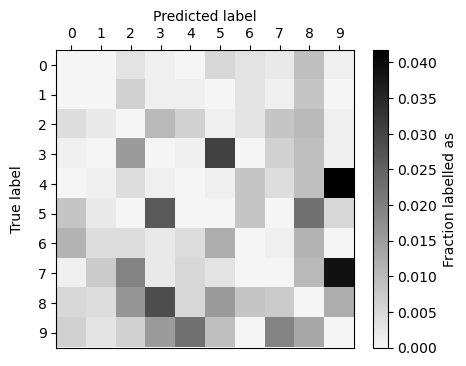

In [39]:

im = myplot.plot_confusion_matrix(idx_arr,10,logScale=False,cmap=myplot.cmap_to_gray("black",reverse=True), title="")#,title="Confusion matrix:\n MCM(n=5423) on test set")
plt.colorbar(im,shrink=.8).set_label("Fraction labelled as")
plt.savefig("./img/confusion_testacc.png",dpi=300, bbox_inches="tight")

### Mean test accuracy over N

In [40]:

sample_sizes_all = list(np.arange(100,5400,100)) + [5423]
sample_sizes_all = [100, 200, 300]

In [41]:
# call multiple times to not run out of memory

out = list()
for i, ss in enumerate(sample_sizes_all):
    print(ss)

    counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm([ss], letter="", path_format="../data/Output/mcm/sample_sizes")
    atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

    break
    out.append(mean_test_acc(atest_probs[:,0,0]))
    print(ss)

100


In [42]:
# 3 vs 5 curve mean, ci
# mean ci of overall test accuracy

In [43]:
per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc
per_image_prob.shape

(10, 10, 892)

In [44]:
import os

# Get the current directory
current_dir = os.getcwd()

# Create the file path
file_path = os.path.join(current_dir, "test_accuracies_over_sample_sizes.txt")

# Open the file in write mode
with open(file_path, "w") as file:
    # Write the list "out" to the file
    for item in out:
        file.write(str(item) + "\n")

In [45]:
import numpy as np

file_path = '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/test_accuracies_over_sample_sizes.txt'
data = np.loadtxt(file_path)

print(data)

[]


/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_69117/2957816864.py:4: UserWarning: loadtxt: input contained no data: "/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/test_accuracies_over_sample_sizes.txt"
  data = np.loadtxt(file_path)


ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

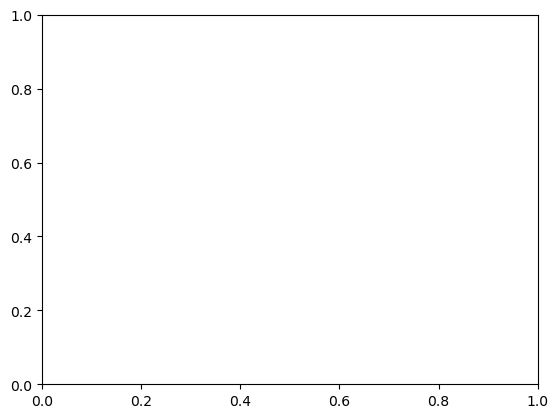

In [46]:
import matplotlib.pyplot as plt

# Create the plot
plt.plot(sample_sizes_all, data, marker='o')

# Set the x-axis labels
plt.xticks(sample_sizes_all, rotation=90)

# Set the axis labels and title
plt.xlabel('Training sample size')
plt.ylabel('Test accuracy')
plt.xticks([0]+sample_sizes_all[1::2] + [5423], rotation=90)

# Show the plot
plt.savefig("./img/test_accuracies_overN.png", dpi=300, bbox_inches="tight")

In [ ]:
sample_sizes_all.index(2000)

19

In [ ]:
data[20]

0.9162556053811658